# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [3]:
# student 1: Reut Maor 0652
# student 2: Mark David 4354

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Read the data
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')



## Exploratory Data Analysis (EDA)


In [8]:

# Display initial data
print("Train set:")
print(train_df.head())
print("\nTest set:")
print(test_df.head())


Train set:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test set:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


## Display basic statistics


In [10]:

train_stats = train_df.describe(include='all')
test_stats = test_df.describe(include='all')

print("\nTrain set statistics:")
print(train_stats)

print("\nTest set statistics:")
print(test_stats)


Train set statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

## Visualizations


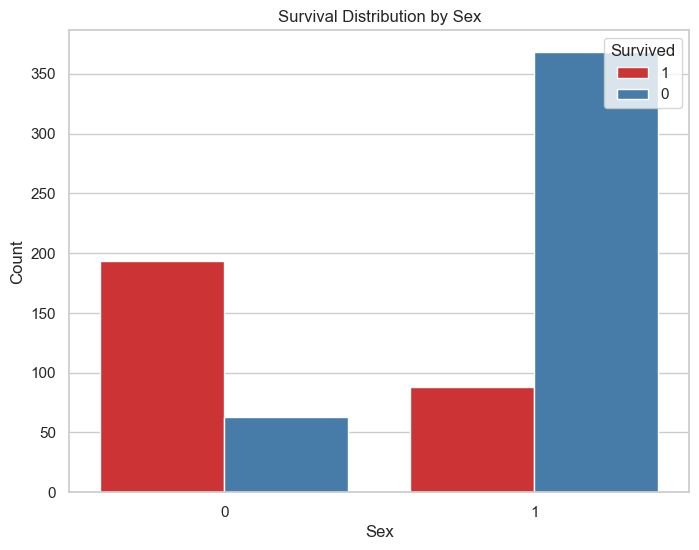

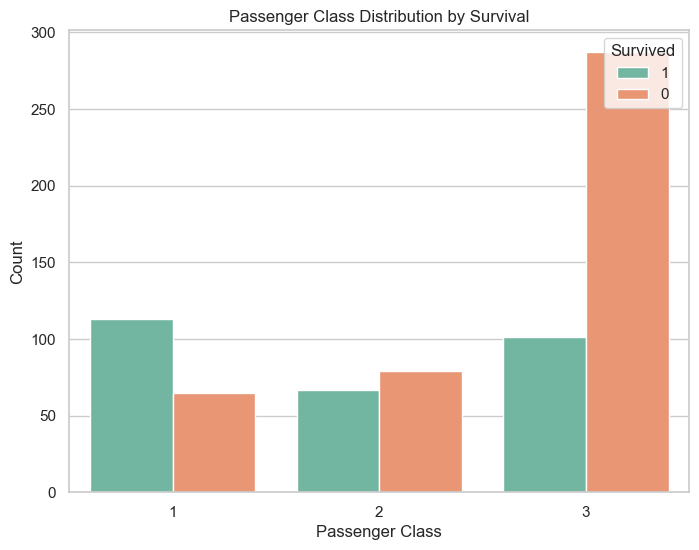

C:\Users\madabo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


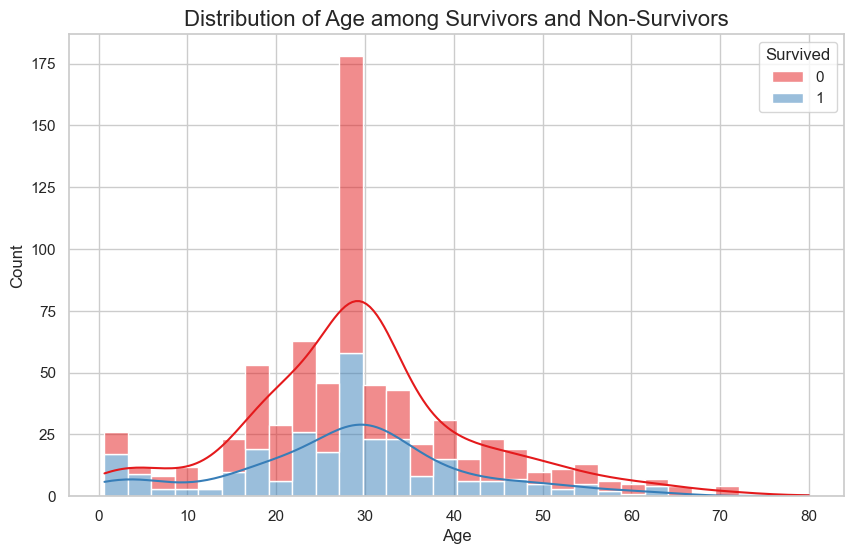

In [12]:
# Convert all columns to strings
train_df = train_df.astype(str)

# Set up the style for the plots
sns.set(style="whitegrid")

# Survival distribution by sex
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Passenger class distribution by survival
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Passenger Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Convert the 'Age' and 'Survived' columns to numeric for proper handling
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')
train_df['Survived'] = pd.to_numeric(train_df['Survived'], errors='coerce')

# Set up the plot for age distribution among survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', kde=True, palette='Set1', bins=30)

# Add titles and labels
plt.title('Distribution of Age among Survivors and Non-Survivors', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

## Data Preparation


In [15]:
def prepare_data(df):
    # Select features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    X = df[features]
    y = df['Survived']
 
    return X, y

## Display data before scaling


In [17]:

# Prepare train and test data
X_train, y_train = prepare_data(train_df)
X_test, y_test = prepare_data(test_df)


# Display data before scaling
print("Train data before scaling:")
print(X_train.head())

print("\n" + "="*50 + "\n")  # Separating row

print("Test data before scaling:")
print(X_test.head())


print("\n" + "="*50 + "\n")  # Separating row


Train data before scaling:
  Pclass Sex   Age SibSp Parch     Fare Embarked
0      1   0  54.0     1     0  78.2667        1
1      2   0  45.0     0     0     13.5        0
2      3   1  20.0     0     0      9.5        0
3      3   1  36.0     0     0   7.8958        0
4      3   1  22.0     0     0     8.05        0


Test data before scaling:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0       3    1  35.000000      0      0   7.0500         0
1       3    1  30.000000      0      0   7.2500         0
2       3    1  29.699118      0      0  14.5000         0
3       3    0  21.000000      0      0   7.7500         2
4       3    1  32.000000      0      0  56.4958         0




## Data Scaling and Display


In [19]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for easier viewing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display data after scaling
print("Train data after scaling:")
print(X_train_scaled_df.head())

print("\n" + "="*50 + "\n")  # Separating row

print("Test data after scaling:")
print(X_test_scaled_df.head())


print("\n" + "="*50 + "\n")  # Separating row

Train data after scaling:
     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0 -1.539037 -1.334635  1.856683  0.447601 -0.479528  0.921411  0.966584
1 -0.350540 -1.334635  1.173766 -0.500887 -0.479528 -0.379097 -0.573031
2  0.837957  0.749269 -0.723225 -0.500887 -0.479528 -0.459416 -0.573031
3  0.837957  0.749269  0.490849 -0.500887 -0.479528 -0.491629 -0.573031
4  0.837957  0.749269 -0.571466 -0.500887 -0.479528 -0.488532 -0.573031


Test data after scaling:
     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0  0.837957  0.749269  0.414970 -0.500887 -0.479528 -0.508612 -0.573031
1  0.837957  0.749269  0.035571 -0.500887 -0.479528 -0.504596 -0.573031
2  0.837957  0.749269  0.012741 -0.500887 -0.479528 -0.359017 -0.573031
3  0.837957 -1.334635 -0.647345 -0.500887 -0.479528 -0.494556  2.506199
4  0.837957  0.749269  0.187331 -0.500887 -0.479528  0.484254 -0.573031




## Function to perform grid search


In [21]:
# Function to perform grid search
def perform_grid_search(X, y, model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X, y)
    return grid_search.best_estimator_, grid_search.best_params_


## KNN


In [23]:

# Define KNN parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn_best_no_scaling, knn_best_params_no_scaling = perform_grid_search(X_train, y_train, KNeighborsClassifier(), knn_param_grid)
test_preds_knn_no_scaling = knn_best_no_scaling.predict(X_test).astype(int)

knn_best_scaled, knn_best_params_scaled = perform_grid_search(X_train_scaled, y_train, KNeighborsClassifier(), knn_param_grid)
test_preds_knn_scaled = knn_best_scaled.predict(X_test_scaled).astype(int)


accuracy_test_knn_no_scaling = accuracy_score(y_test, test_preds_knn_no_scaling)
report_test_knn_no_scaling = classification_report(y_test, test_preds_knn_no_scaling, target_names=['Not Survived', 'Survived'])

accuracy_test_knn_scaled = accuracy_score(y_test, test_preds_knn_scaled)
report_test_knn_scaled = classification_report(y_test, test_preds_knn_scaled, target_names=['Not Survived', 'Survived'])



## DT


In [25]:
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'max_leaf_nodes': [10, 20, 30, 40, 50]
}

dt_best_no_scaling, dt_best_params_no_scaling = perform_grid_search(X_train, y_train, DecisionTreeClassifier(), dt_param_grid)
test_preds_dt_no_scaling = dt_best_no_scaling.predict(X_test).astype(int)

dt_best_scaled, dt_best_params_scaled = perform_grid_search(X_train_scaled, y_train, DecisionTreeClassifier(), dt_param_grid)
test_preds_dt_scaled = dt_best_scaled.predict(X_test_scaled).astype(int)

accuracy_test_dt_no_scaling = accuracy_score(y_test, test_preds_dt_no_scaling)
report_test_dt_no_scaling = classification_report(y_test, test_preds_dt_no_scaling, target_names=['Not Survived', 'Survived'])

accuracy_test_dt_scaled = accuracy_score(y_test, test_preds_dt_scaled)
report_test_dt_scaled = classification_report(y_test, test_preds_dt_scaled, target_names=['Not Survived', 'Survived'])




## Display Model Result


In [27]:
print("\nKNN without scaling - Test Set Results:")
print(f"Accuracy: {accuracy_test_knn_no_scaling}")
print(report_test_knn_no_scaling)

print("\nKNN with scaling - Test Set Results:")
print(f"Accuracy: {accuracy_test_knn_scaled}")
print(report_test_knn_scaled)

print("\nDecision Tree without scaling - Test Set Results:")
print(f"Accuracy: {accuracy_test_dt_no_scaling}")
print(report_test_dt_no_scaling)

print("\nDecision Tree with scaling - Test Set Results:")
print(f"Accuracy: {accuracy_test_dt_scaled}")
print(report_test_dt_scaled)


KNN without scaling - Test Set Results:
Accuracy: 0.7653631284916201
              precision    recall  f1-score   support

Not Survived       0.80      0.86      0.83       118
    Survived       0.69      0.57      0.62        61

    accuracy                           0.77       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.76      0.77      0.76       179


KNN with scaling - Test Set Results:
Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

Not Survived       0.89      0.87      0.88       118
    Survived       0.76      0.79      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Decision Tree without scaling - Test Set Results:
Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

Not Survived       0.84      0.94      0.89       118
    Survived       0

## Summary Table of Model Results


In [29]:
results = {
    'Model': ['KNN', 'KNN', 'Decision Tree', 'Decision Tree'],
    'Scaling': ['No', 'Yes', 'No', 'Yes'],
    'Accuracy': [accuracy_test_knn_no_scaling, accuracy_test_knn_scaled, accuracy_test_dt_no_scaling, accuracy_test_dt_scaled],
    'F1-Score': [
        classification_report(y_test, test_preds_knn_no_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_knn_scaled, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_dt_no_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, test_preds_dt_scaled, output_dict=True)['macro avg']['f1-score']
    ]
}
results_df = pd.DataFrame(results)
print("\nComparison of results between models with and without scaling:")
print(results_df.to_markdown(index=False))

best_params_results = {
    'Model': ['KNN No Scaling', 'KNN Scaling', 'Decision Tree No Scaling', 'Decision Tree Scaling'],
    'Best Hyperparameters': [knn_best_params_no_scaling, knn_best_params_scaled, dt_best_params_no_scaling, dt_best_params_scaled]
}
best_params_df = pd.DataFrame(best_params_results)

# Display the table of best hyperparameter combinations in an organized manner
print("\nBest combinations of hyperparameters:")
print(best_params_df.to_markdown(index=False))


Comparison of results between models with and without scaling:
| Model         | Scaling   |   Accuracy |   F1-Score |
|:--------------|:----------|-----------:|-----------:|
| KNN           | No        |   0.765363 |   0.727134 |
| KNN           | Yes       |   0.843575 |   0.827268 |
| Decision Tree | No        |   0.843575 |   0.81437  |
| Decision Tree | Yes       |   0.843575 |   0.812369 |

Best combinations of hyperparameters:
| Model                    | Best Hyperparameters                      |
|:-------------------------|:------------------------------------------|
| KNN No Scaling           | {'metric': 'manhattan', 'n_neighbors': 7} |
| KNN Scaling              | {'metric': 'euclidean', 'n_neighbors': 3} |
| Decision Tree No Scaling | {'max_depth': 9, 'max_leaf_nodes': 20}    |
| Decision Tree Scaling    | {'max_depth': 9, 'max_leaf_nodes': 20}    |


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Get the best model and whether to scale

In [32]:
# Function to determine the best model
def get_best_model(results_df):
    best_row = results_df.loc[results_df['Accuracy'].idxmax()]
    if best_row['Model'] == 'KNN':
        if best_row['Scaling'] == 'Yes':
            return KNeighborsClassifier(**knn_best_params_scaled), True
        else:
            return KNeighborsClassifier(**knn_best_params_no_scaling), False
    else:  # Decision Tree
        if best_row['Scaling'] == 'Yes':
            return DecisionTreeClassifier(**dt_best_params_scaled), True
        else:
            return DecisionTreeClassifier(**dt_best_params_no_scaling), False

# Get the best model and whether to scale
best_model, should_scale = get_best_model(results_df)

print(best_model)
print(should_scale)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)
True


##  Data Scaling if necessary and Model Training


In [34]:
if should_scale:
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
else:
    X_train_scaled, X_test_scaled = X_train, X_test

# Train the best model
best_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## Part 5 - Apply on test and show model performance estimation

### Model Training, Prediction, and Evaluation|

In [37]:
# Train the best model
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Convert predictions to integers
y_test_pred = y_test_pred.astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred, target_names=['Not Survived', 'Survived'])

# Print results
print(f"Best Model: {best_model.__class__.__name__}")
print(f"Scaling: {'Yes' if should_scale else 'No'}")
print(f"Best parameters: {best_model.get_params()}")

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(report)

# Display test predictions
print("\nTest Predictions (first 20):")
print(y_test_pred[:20])

# Compare predictions with actual values
print("\nComparison of Predictions vs Actual (first 20):")
comparison = pd.DataFrame({'Actual': y_test[:20], 'Predicted': y_test_pred[:20]})
print(comparison.to_string(index=False))

Best Model: KNeighborsClassifier
Scaling: Yes
Best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Test Set Performance:
Accuracy: 0.8436

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.89      0.87      0.88       118
    Survived       0.76      0.79      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Test Predictions (first 20):
[0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0]

Comparison of Predictions vs Actual (first 20):
 Actual  Predicted
      0          0
      0          0
      0          0
      0          1
      1          1
      1          1
      0          1
      0          0
      1          1
      0          0
      1          1
      0          0
      0          1
      0   